## Airbnb Data Analysis: London Listings

### Project Overview

This project analyzes Airbnb listings in London to provide actionable insights for hosts and travelers. The analysis includes:

1. **Data Cleaning:**
   - Removed columns with all null values (`license`, `neighbourhood_group`).
   - Handled missing values by removing rows where critical information (e.g., `price`, `last_review`) was missing.

2. **Exploratory Data Analysis (EDA):**
   - Generated descriptive statistics for key features such as `price`, `minimum_nights`, and `reviews_per_month`.
   - Visualized correlations between variables using a heatmap.
   - Analyzed distribution patterns of room types, neighborhoods, and prices.
   - Examined trends in reviews over time.

3. **Data Visualization:**
   - Created visual representations including histograms, count plots, and line plots to illustrate key findings.
   - Focused on room type distribution, neighborhood popularity, price distribution, and availability trends.

4. **Insights and Recommendations:**
   - Identified pricing strategies based on neighborhood, room type, and seasonal trends.
   - Suggested dynamic pricing, leveraging reviews, and enhanced amenities to optimize revenue.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
london = pd.read_csv('London.csv')
london.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41445,2 Double bed apartment in quiet area North London,180838,Sean,NaN,Barnet,51.61492,-0.25632,Entire home/apt,150.0,4,21,2024-06-07,0.14,1,175,2,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,53.0,1,42,2024-05-03,0.25,3,331,2,NaN
2,41509,Room in maisonette in chiswick,181028,Peter,NaN,Hounslow,51.49351,-0.25568,Private room,NaN,1,71,2019-12-23,0.45,1,0,0,NaN
3,41712,"Room with a view, shared flat, central Bankside",182322,Nina,NaN,Southwark,51.50191,-0.10204,Private room,89.0,2,127,2024-06-07,0.78,2,344,16,NaN
4,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,120.0,4,96,2024-04-28,0.54,1,163,2,NaN


#### number of rows in our dataset

In [3]:
len(london)

93481

#### Dataset Overview

In [4]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93475 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           61422 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_review                     

#### Removing columns with all null values

In [5]:
london = london.drop(['license', 'neighbourhood_group'], axis = 1)
london

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,41445,2 Double bed apartment in quiet area North London,180838,Sean,Barnet,51.614920,-0.256320,Entire home/apt,150.0,4,21,2024-06-07,0.14,1,175,2
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.568610,-0.112700,Private room,53.0,1,42,2024-05-03,0.25,3,331,2
2,41509,Room in maisonette in chiswick,181028,Peter,Hounslow,51.493510,-0.255680,Private room,NaN,1,71,2019-12-23,0.45,1,0,0
3,41712,"Room with a view, shared flat, central Bankside",182322,Nina,Southwark,51.501910,-0.102040,Private room,89.0,2,127,2024-06-07,0.78,2,344,16
4,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.487800,-0.168130,Entire home/apt,120.0,4,96,2024-04-28,0.54,1,163,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,1177709256939475975,Artsy Flat in Shoreditch,566738155,Ayhan,Tower Hamlets,51.523940,-0.071544,Entire home/apt,170.0,1,0,NaN,NaN,2,224,0
93477,1177709558154406179,Mill Hill - Lovely Single Room,539428638,Ibitamuno,Barnet,51.622754,-0.255025,Private room,40.0,1,0,NaN,NaN,2,365,0
93478,1177713042644160138,LUX Holland Park Studio with AC - sleeps up to 8,253862864,Niko,Kensington and Chelsea,51.497430,-0.206640,Entire home/apt,246.0,2,0,NaN,NaN,17,61,0
93479,1177714132542865912,Spacious Room in 5bhk house,514760182,Tamanna,Tower Hamlets,51.523280,-0.049460,Private room,80.0,1,0,NaN,NaN,3,365,0


In [6]:
# missing values in columns
missing_data = london.isnull().sum()
print(missing_data)

id                                    0
name                                  0
host_id                               0
host_name                             6
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             32059
minimum_nights                        0
number_of_reviews                     0
last_review                       24742
reviews_per_month                 24742
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64


Since we have missing values in critical columns like `price` and review-related information, filling them might introduce bias or inaccuracies in our analysis. These columns are vital for understanding pricing trends and customer feedback, so preserving data integrity is essential. Instead of filling these missing values, which could distort the dataset, it is better to remove the affected rows. 

Even after removing rows with missing values, we still have over 46,000 rows, which provides a robust sample size for reliable analysis.


In [7]:
# Drop rows with missing price
london = london.dropna(subset=['price', 'last_review','reviews_per_month','host_name'])
london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46681 entries, 0 to 93313
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              46681 non-null  int64  
 1   name                            46681 non-null  object 
 2   host_id                         46681 non-null  int64  
 3   host_name                       46681 non-null  object 
 4   neighbourhood                   46681 non-null  object 
 5   latitude                        46681 non-null  float64
 6   longitude                       46681 non-null  float64
 7   room_type                       46681 non-null  object 
 8   price                           46681 non-null  float64
 9   minimum_nights                  46681 non-null  int64  
 10  number_of_reviews               46681 non-null  int64  
 11  last_review                     46681 non-null  object 
 12  reviews_per_month               46681

Before diving deeper into the analysis, let's take a closer look at the summary statistics of our dataset. This will give us an overview of the central tendencies, dispersion, and overall distribution of key numerical features in the dataset.


In [10]:
print(london[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe(include = 'all'))


               price  minimum_nights  number_of_reviews last_review  \
count   46681.000000    46681.000000       46681.000000       46681   
unique           NaN             NaN                NaN        1790   
top              NaN             NaN                NaN  2024-06-09   
freq             NaN             NaN                NaN        1726   
mean      197.488957        4.406397          30.746128         NaN   
std      1023.175278       15.199944          58.612502         NaN   
min         0.000000        1.000000           1.000000         NaN   
25%        75.000000        1.000000           3.000000         NaN   
50%       133.000000        2.000000          11.000000         NaN   
75%       219.000000        3.000000          32.000000         NaN   
max     80000.000000      999.000000        1678.000000         NaN   

        reviews_per_month  calculated_host_listings_count  availability_365  \
count        46681.000000                    46681.000000      46681

### Summary Statistics of Key Features

The table above provides a statistical summary of key numerical features in our dataset:

- **Price**: 
  - The average price of Airbnb listings is approximately 197.49 Dollars , with a wide range from 0 to a staggering 80,000 Dollars .
  - The distribution is highly skewed to the right, with the median price at 133 Dollars, indicating that most listings are priced below the mean.

- **Minimum Nights**:
  - On average, the minimum stay requirement is about 4.4 nights, but most listings require only 1 to 2 nights.
  - The maximum recorded minimum stay is 999 nights, likely an outlier.

- **Number of Reviews**:
  - The average number of reviews per listing is around 30.75, with some listings receiving as many as 1,678 reviews.
  - The median number of reviews is 11, showing that many listings have received relatively few reviews.

- **Reviews per Month**:
  - On average, listings receive about 1.27 reviews per month, with a range from 0.01 to 44.68 reviews per month.

- **Availability (365 days)**:
  - Listings are available for an average of 174.57 days per year, with some listings available all year round and others not available at all.

- **Number of Reviews in the Last 12 Months (LTM)**:
  - On average, listings have received about 10.43 reviews in the past year, with a median of 5 reviews, indicating recent activity.

These statistics offer a snapshot of the dataset, highlighting the wide variability in pricing, availability, and review counts across Airbnb listings in London.


In [12]:
# changing the data type of last review to date_time
london['last_review'] = pd.to_datetime(london['last_review'])
london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46681 entries, 0 to 93313
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46681 non-null  int64         
 1   name                            46681 non-null  object        
 2   host_id                         46681 non-null  int64         
 3   host_name                       46681 non-null  object        
 4   neighbourhood                   46681 non-null  object        
 5   latitude                        46681 non-null  float64       
 6   longitude                       46681 non-null  float64       
 7   room_type                       46681 non-null  object        
 8   price                           46681 non-null  float64       
 9   minimum_nights                  46681 non-null  int64         
 10  number_of_reviews               46681 non-null  int64         
 11  last_re

C:\Users\najyw\AppData\Local\Temp\ipykernel_11272\2705646135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london['last_review'] = pd.to_datetime(london['last_review'])


In [77]:
# Extracting the year from the 'last_review' column
london['year'] = london['last_review'].dt.year

# Displaying the unique years in the dataset
print(london['year'].unique())


[2024 2022 2021 2023 2020 2017 2012 2016 2019 2015 2014 2013 2018]


this dataset contains information from 2012 to 2023

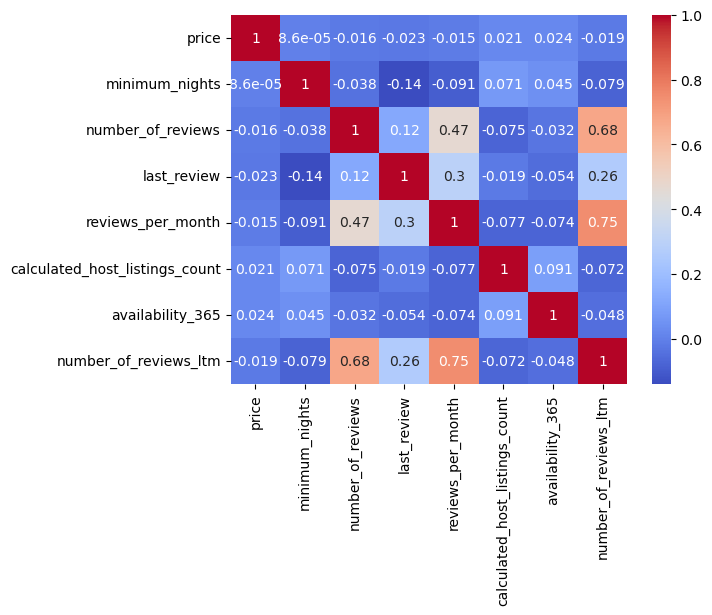

In [27]:
# correlation matrix
corr_matrix = london[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].corr()
sns.heatmap(corr_matrix, annot =True, cmap = 'coolwarm')
plt.show()

### Correlation Heatmap of Key Features

The heatmap above displays the correlation matrix between various numerical features in the Airbnb London dataset:

- **Price**: The price shows very weak correlations with other variables, suggesting that pricing may be influenced by factors not captured in this dataset or requires more complex modeling.
  
- **Number of Reviews**: There is a strong positive correlation (0.68) between the number of reviews and the number of reviews in the last 12 months (`number_of_reviews_ltm`). This is expected as recent reviews contribute to the overall count.
  
- **Reviews per Month**: This variable has a moderate positive correlation with both `number_of_reviews` (0.47) and `number_of_reviews_ltm` (0.75), indicating that listings with more consistent monthly reviews tend to have higher total reviews.

- **Availability**: The availability of a listing over 365 days shows minimal correlation with most variables, indicating that availability might be a unique factor driven by host preferences or seasonal demand rather than other features like price or reviews.


#### Distribution of room type and its relationship with price

C:\Users\najyw\AppData\Local\Temp\ipykernel_11272\3665596315.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(average_price_per_neighbourhood.index)


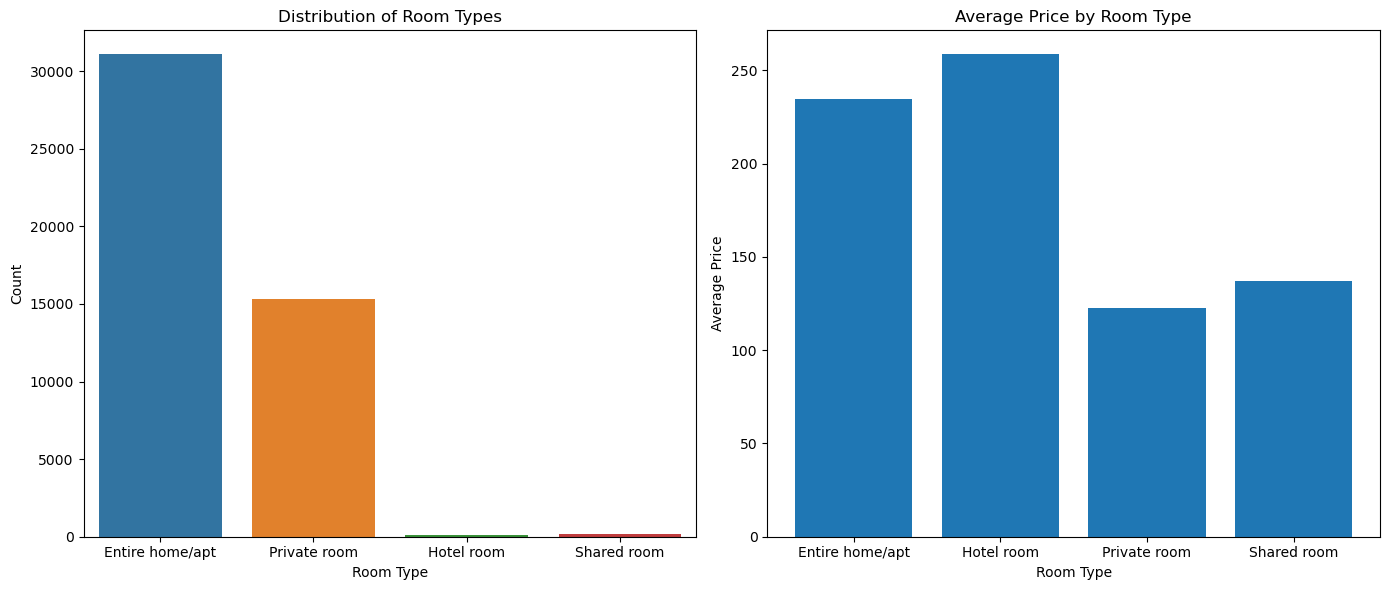

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of Room Types
sns.countplot(data=london, x='room_type', ax=axes[0])
axes[0].set_title('Distribution of Room Types')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Count')

# Plot 2: Average Price by Room Type
average_price_per_neighbourhood = london.groupby('room_type')['price'].mean()


axes[1].bar(x=average_price_per_neighbourhood.index, height=average_price_per_neighbourhood)
axes[1].set_title('Average Price by Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Average Price')
axes[1].set_xticklabels(average_price_per_neighbourhood.index)

plt.tight_layout()
plt.show()


### Room Type Analysis

The visualizations above illustrate the distribution of different room types and their corresponding average prices in London Airbnb listings:

- **Demand**: The first plot shows that the demand for entire homes or apartments is significantly higher than other accommodation types, with over 30,000 listings. This suggests that travelers prefer private and fully furnished spaces.
  
- **Pricing**: The second plot reveals that hotel rooms command the highest prices among the available room types, followed closely by entire homes or apartments. In contrast, shared and private rooms tend to be more affordable options for budget-conscious travelers.

These insights are crucial for Airbnb hosts to understand market dynamics and tailor their offerings and pricing strategies accordingly.


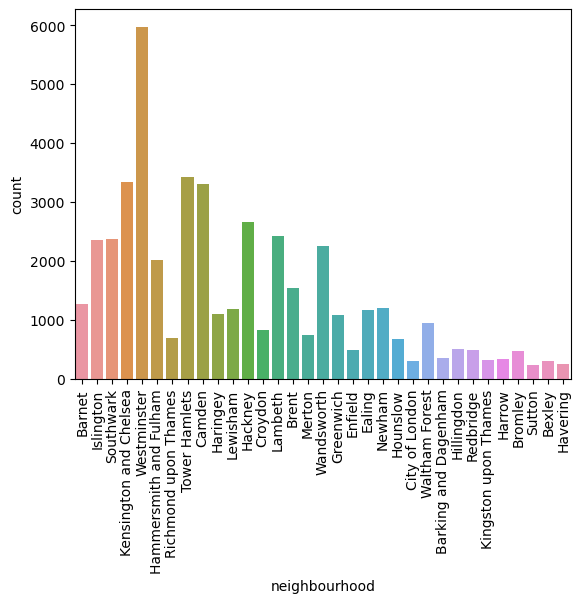

In [17]:
# Neighboorhood distribution
sns.countplot(data = london, x = 'neighbourhood')
plt.xticks(rotation = 90)
plt.show()

#### Neighborhood Distribution of Airbnb Listings

The bar chart illustrates the number of Airbnb listings across various London neighborhoods. Notably, **Westminster**, **Kensington and Chelsea**, **Tower Hamlets**, and **Camden** have the highest concentration of listings, suggesting these are popular or high-demand areas.

**Insights:**
- Neighborhoods with more listings likely attract more tourists or have a higher density of rental properties.
- Areas with fewer listings may either be less popular for short-term rentals or have fewer properties available for Airbnb use.


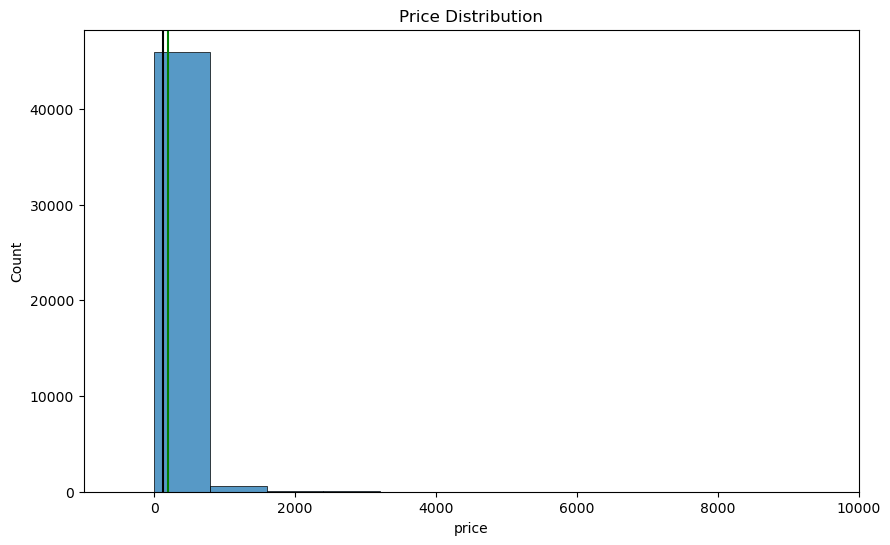

In [19]:
# price distribution
plt.figure(figsize=(10,6))
sns.histplot(london['price'], bins=100)
plt.axvline(np.mean(london['price']), color='green')
plt.axvline(np.median(london['price']), color='black')
plt.xlim(-1000,10000)
plt.title('Price Distribution')
plt.show()

This histogram visualizes the distribution of Airbnb prices in London. The majority of prices are condensed below $1,000, as indicated by the dense cluster of bars on the left side of the plot. The distribution is highly right-skewed, with a few listings having significantly higher prices.

Green Line: Represents the mean price of all listings.
Black Line: Represents the median price of all listings.
The x-axis is capped at 10,000 Dollars to focus on the main distribution, even though the highest price reaches as high as 80,000 Dollars.

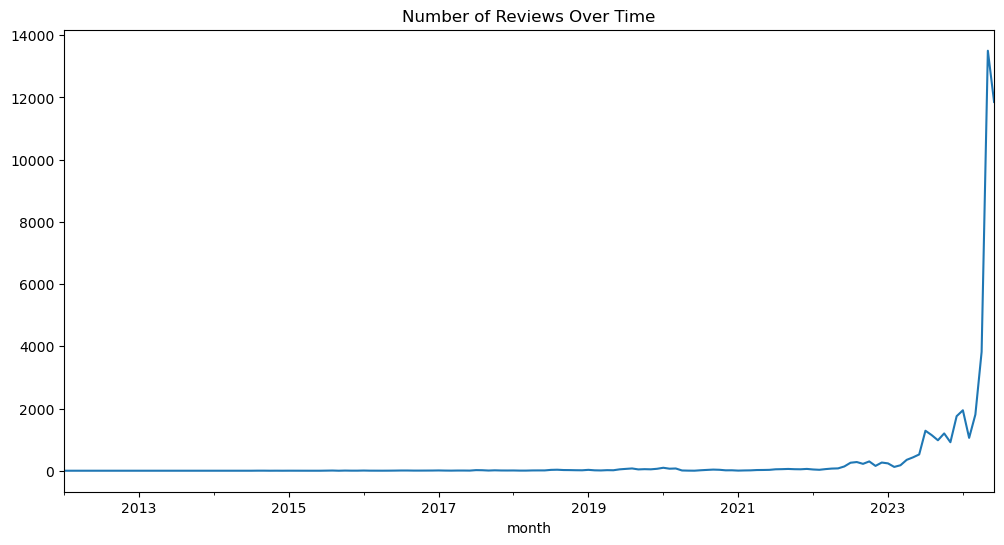

In [58]:
london['month'] = london['last_review'].dt.to_period('M')
monthly_reviews = london.groupby('month').size()
monthly_reviews.plot(kind='line', figsize=(12,6))
plt.title('Number of Reviews Over Time')
plt.show()


#### Reviews Over Time
The line plot above shows the trend in the number of reviews over time for Airbnb listings in London. The number of reviews has increased since 2023, with a noticeable peak in the middle of the year. This upward trend could indicate growing popularity or increased bookings during specific periods, likely due to seasonal factors or other external influences.

These insights can help identify periods of high activity, which might be useful for hosts to optimize their pricing strategies or for travelers to plan their visits.

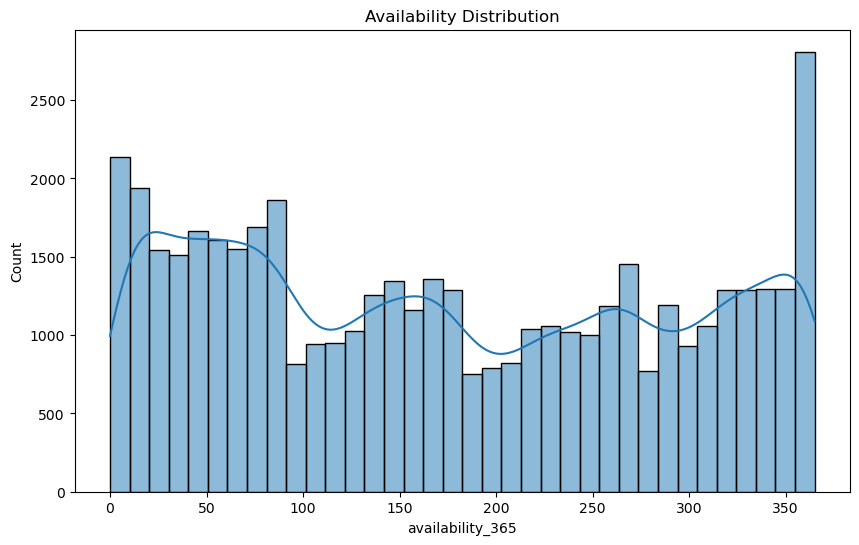

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(london['availability_365'], bins=36, kde=True)
plt.title('Availability Distribution')
plt.show()


### Availability Distribution of Airbnb Listings in London

The histogram above illustrates the distribution of Airbnb listing availability throughout the year (`availability_365`). The x-axis represents the number of days a property is available for rent within a year, while the y-axis represents the count of properties.

#### Insights:
- **High Availability**: There is a significant spike in availability at 365 days, indicating that many properties are available year-round. This may suggest that these listings are dedicated to short-term rentals rather than being owner-occupied or rented on a longer-term basis.
  
- **Seasonal Trends**: The distribution shows moderate fluctuations across the rest of the year, suggesting that availability might be affected by seasonal trends or the specific rental strategies of the hosts. For instance, there might be higher availability during the winter months (especially around December and early in the year) as demand fluctuates, possibly due to fewer tourists.

These insights can help hosts and property managers understand the competitive landscape and potentially adjust their pricing and availability strategies to maximize bookings, particularly during high-demand periods.


### Pricing Strategies for Airbnb Hosts

Based on the detailed analysis of Airbnb listings in London, here are targeted pricing strategies that hosts should consider to maximize both occupancy and revenue:

1. **Neighborhood-Specific Pricing:**
   - Hosts in popular, high-demand neighborhoods such as **Westminster**, **Kensington and Chelsea**, and **Tower Hamlets** should leverage their location by setting premium prices. These areas are highly sought after, so pricing can reflect the desirability and convenience they offer to travelers.
   - Conversely, in less popular neighborhoods, competitive pricing may attract more bookings, helping to balance demand.

2. **Room Type Influence:**
   - **Hotel rooms** command the highest prices, followed closely by entire homes or apartments. Hosts offering these accommodations should position their pricing at the higher end, taking into account the privacy and amenities provided.
   - **Shared and private rooms** typically cater to budget-conscious travelers. While these should be priced lower, consider adding value through enhanced amenities to justify a moderate price increase.

3. **Seasonal Adjustments:**
   - Adjust prices based on seasonal demand. During peak periods, such as holidays and events, increase prices to capitalize on higher demand. Conversely, during off-peak periods, offering discounts can help maintain occupancy.

4. **Dynamic Pricing:**
   - Implement dynamic pricing models that adjust based on local demand, competition, and events. For example, increase prices during local events or when nearby listings are fully booked.

5. **Leverage Reviews and Ratings:**
   - Listings with high ratings and a significant number of reviews can justify premium pricing. Encourage guests to leave reviews and maintain high service standards to command higher prices.

6. **Competitive Analysis:**
   - Regularly compare prices with similar listings in the area to ensure that your pricing remains competitive while maximizing revenue.

7. **Special Discounts:**
   - Offering discounts for extended stays or last-minute bookings can help fill vacancies, especially during slow periods.

8. **Enhanced Amenities:**
   - Providing additional amenities, such as complimentary breakfast, high-speed Wi-Fi, or a more flexible cancellation policy, can justify higher prices and attract more bookings.


### Conclusion

This analysis of Airbnb listings in London provides valuable insights into pricing strategies and market dynamics. By examining key features such as neighborhood, room type, and availability, we identified critical factors that influence pricing. High-demand areas like **Westminster** and **Kensington and Chelsea** allow for premium pricing, while the influence of room type suggests that entire homes and hotel rooms command higher prices. Seasonal and dynamic pricing adjustments, leveraging reviews, and enhancing amenities are essential strategies for maximizing revenue and occupancy. These findings can guide hosts in optimizing their listings to align with market trends and traveler preferences.
